**Princess Ibtihaj**
    
Fall 2024
    
CS 251 / 252: Data Analysis and Visualization
    
Project 4: Principal Component Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})
    
np.set_printoptions(suppress=True, precision=5)
    
# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 2: Principal component analysis
    
In this task, you will implement principal component analysis (PCA) to reduce the dimensionality of data while maximizing the information that is preserved. You will use the mystery dataset to test your code and ultimately compare how PCA reduces the dimensionality from 3D to 2D with your manual rotation and projection.

In [ ]:
import pca

### 2a. Import mystery dataset

In the below cell:
- load in the mystery dataset (`mystery.csv`) into a pandas DataFrame called `mys_data`.
- select the `x`, `y`, and `z` variables (drop the `color` variable).
- print out the head (only showing the first 5 data samples).
- create an `PCA` object called `mys_pca` based on the DataFrame that you just created.
    
Your code should print something that looks like this:
    
          x           y           z
0  6.183216   86.707892   90.551566
1  0.969658   16.972285  137.976605
2  0.727076   57.112193  139.795502
3  8.433828   30.348513  113.600202
4  8.188306  133.978413  120.671505
    

In [2]:
import pandas as pd 
from pca import PCA  

mys_data = pd.read_csv('data/mystery.csv')
mys_data = mys_data[['x', 'y', 'z']]

print(mys_data.head())

mys_pca = PCA(mys_data)


          x           y           z
0  6.183216   86.707892   90.551566
1  0.969658   16.972285  137.976605
2  0.727076   57.112193  139.795502
3  8.433828   30.348513  113.600202
4  8.188306  133.978413  120.671505


### 2b. Implement PCA
    
Implement and test the following methods necessary to perform PCA in `pca.py`.
    
- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `fit`: Method to compute the PCs of the dataset (e.g. eigenvectors, eigenvalues).
- `elbow_plot`: Plots the cumulative variance accounted for with different numbers of PCS.
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix'

In [4]:
# Test covariance here
import numpy as np
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = mys_pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\\n{cov_mat} and should be\\n[[ 1.06338 -0.07562  0.11267]\\n [-0.07562  0.97412 -0.0222 ]\\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:\n[[ 1.06337985 -0.07561529  0.11267373]
 [-0.07561529  0.97411743 -0.02219818]
 [ 0.11267373 -0.02219818  0.96216674]] and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`
    
Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [5]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = mys_pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\\n{prop_var[:2]} and it should be\\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with\n[0.15649813681155653, 0.1448232917174111] and it should be\n[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`
    
Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [6]:
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = mys_pca.compute_prop_var(test_evals)
accum_var = mys_pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\\n{accum_var[:2]} and should be\\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with\n[0.15649813681155653, 0.3013214285289676] and should be\n[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `fit`

Performs PCA using the covariance matrix method.

In [9]:
mys_headers = list(mys_data.columns)
mys_pca.fit(mys_headers)
    
print(f'There are {len(mys_pca.vars)} vars in Mystery PCA and there should be 3.')
print(f'The original PCA data has shape {mys_pca.A.shape} and should be (2000, 3).')
print(f'Eigenvector shape: {mys_pca.e_vecs.shape} should be (3, 3).\\nEigenvalue shape: {mys_pca.e_vals.shape} should be (3,).')
print(f'Length of proportion variance account for: {len(mys_pca.get_prop_var())} should be 3.')
print(f'Length of cumulative proportion variance account for: {len(mys_pca.get_cum_var())} should be 3.')
print()
    
print(f"Your vars in Mystery PCA:\n{mys_pca.vars}  and they should be\n['x', 'y', 'z']")
print(f'Your eigenvectors:\\n{mys_pca.e_vecs}. They should be\\n[[ 0.0048  -0.00307  0.99998]\\n [ 0.00747 -0.99997 -0.00311]\\n [ 0.99996  0.00749 -0.00478]].')
print(f'Your eigenvalues:\\n{mys_pca.e_vals}. They should be\\n[4922.17303  975.37206   10.95308]')
print(f'Cumulative proportion variance account for:\\n{mys_pca.get_cum_var()}. It should be\\n[0.8330666933541857, 0.9981462157185522, 1.0].')

There are 3 vars in Mystery PCA and there should be 3.
The original PCA data has shape (2000, 3) and should be (2000, 3).
Eigenvector shape: (3, 3) should be (3, 3).\nEigenvalue shape: (3,) should be (3,).
Length of proportion variance account for: 3 should be 3.
Length of cumulative proportion variance account for: 3 should be 3.

Your vars in Mystery PCA:
['x', 'y', 'z']  and they should be
['x', 'y', 'z']
Your eigenvectors:\n[[ 0.00480268  0.99998375 -0.00307119]
 [ 0.00747158 -0.00310702 -0.99996726]
 [ 0.99996055 -0.00477958  0.00748638]]. They should be\n[[ 0.0048  -0.00307  0.99998]\n [ 0.00747 -0.99997 -0.00311]\n [ 0.99996  0.00749 -0.00478]].
Your eigenvalues:\n[4922.173032     10.95308103  975.37205556]. They should be\n[4922.17303  975.37206   10.95308]
Cumulative proportion variance account for:\n[0.8330666933541857, 0.8349204776356336, 1.0]. It should be\n[0.8330666933541857, 0.9981462157185522, 1.0].


In [10]:
mys_headers = list(mys_data.columns)
mys_pca.fit(mys_headers, normalize_dataset=True)
    
print(f'There are {len(mys_pca.vars)} vars in Mystery PCA and there should be 3.')
print(f'The original PCA data has shape {mys_pca.A.shape} and should be (2000, 3).')
print(f'Eigenvector shape: {mys_pca.e_vecs.shape} should be (3, 3).\\nEigenvalue shape: {mys_pca.e_vals.shape} should be (3,).')
print(f'Length of proportion variance account for: {len(mys_pca.get_prop_var())} should be 3.')
print(f'Length of cumulative proportion variance account for: {len(mys_pca.get_cum_var())} should be 3.')
print(f'Data min/max is {mys_pca.A.min()}/{mys_pca.A.max()} should be 0.0/1.0')
print()

print(f'Your eigenvalues:\\n{mys_pca.e_vals}. They should be\\n[0.07135 0.05681 0.04928]')
print(f'Cumulative proportion variance account for:\\n{mys_pca.get_cum_var()}. It should be\\n[0.402116890496464, 0.7222698215107564, 1.0].')

There are 3 vars in Mystery PCA and there should be 3.
The original PCA data has shape (2000, 3) and should be (2000, 3).
Eigenvector shape: (3, 3) should be (3, 3).\nEigenvalue shape: (3,) should be (3,).
Length of proportion variance account for: 3 should be 3.
Length of cumulative proportion variance account for: 3 should be 3.
Data min/max is 0.0/284.51232384624154 should be 0.0/1.0

Your eigenvalues:\n[4922.173032     10.95308103  975.37205556]. They should be\n[0.07135 0.05681 0.04928]
Cumulative proportion variance account for:\n[0.8330666933541857, 0.8349204776356336, 1.0]. It should be\n[0.402116890496464, 0.7222698215107564, 1.0].


#### (v) Test `elbow_plot`
    
Visualize the cumulative proportion variance accounted for by the first $k$ principal components.
    
**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

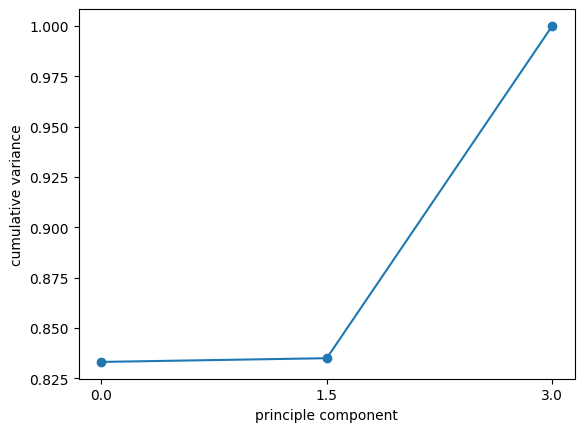

In [13]:
# test elbow plot
mys_pca.elbow_plot()
plt.show()

#### (vi) Test `pca_project`
    
Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`) then make a 2D scatter plot showing your PCA projected data. Label the x and y axes appropriately.

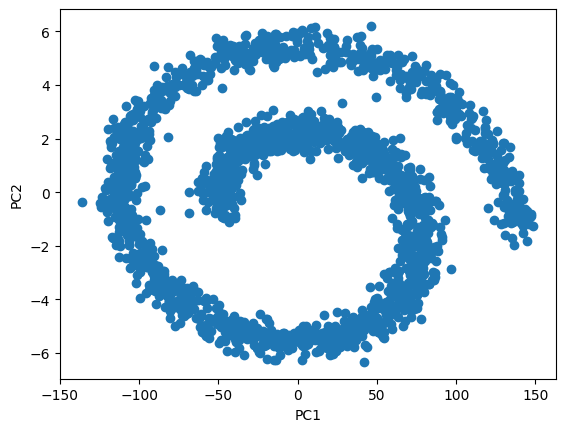

In [14]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
mys_proj = mys_pca.pca_project(pcs_to_keep)

plt.plot(mys_proj[:, 0], mys_proj[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 2c. Questions

**Question 6:** Based on the Mystery elbow plot (Task 2b (v)), how many principal components would you drop and **why?**
    
**Question 7:** How does the the PCA projected version of the mystery dataset compare to the projection that you achieved onto the `x`-`y` plane after rotating the dataset? **Why is there this similarity or difference in the results?**

**Answer 6:** 
Based on the Mystery elbow plot, I would drop 2 principal components. The reason for this decision is that the cumulative variance sharply increases from the first to the second principal component but then levels off and reaches almost 100% by the third principal component. The "elbow" in the plot, which indicates the point of diminishing returns, appears to be between the second and third principal components. By keeping just the first principal component, we can capture the majority of the variance in the dataset while reducing dimensionality. The subsequent components contribute very little additional variance, so they can be dropped without losing much information.
    
**Answer 7:**
The PCA projected version of the mystery dataset in the PC1-PC2 plane reveals a distinct spiral structure, mirroring the appearance observed in the projection onto the `x`-`y` plane after rotating the dataset. This congruence arises because both PCA and manual rotation aim to elucidate the primary patterns in the data. Specifically, PCA captures the maximum variance, with PC1 likely representing the dominant spiral direction and PC2 capturing the spiral's width. Although both methods aim to uncover inherent data structures, potential differences might stem from PCA's mathematical rigor in maximizing variance, while manual rotation could be influenced by visual intuition.